# 1. 데이터 설명

**[HR(Human Resource, 인사관리) Data](https://www.kaggle.com/liujiaqi/hr-comma-sepcsv)**

* satisfaction_level : 직무 만족도
* last_evaluation : 마지막 평가점수
* number_project : 진행 프로젝트 수
* average_monthly_hours : 월평균 근무시간
* time_spend_company : 근속년수
* work_accident : 사건사고 여부(0: 없음, 1: 있음, 명목형)
* left : 이직 여부(0: 잔류, 1: 이직, 명목형)
* promotion_last_5years: 최근 5년간 승진여부(0: 승진 x, 1: 승진, 명목형)
* sales : 부서
* salary : 임금 수준


# 2. 데이터 불러오기 및 Strings 확인


* 데이터 불러오기

> read.csv(): Load CSV Data

In [1]:
HR = read.csv('./HR_comma_sep.csv')

* 데이터 파악하기

> head(): 데이터 윗부분 출력

In [2]:
head(HR)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.72,0.87,5,223,5,0,1,0,sales,low
5,0.37,0.52,2,159,3,0,1,0,sales,low
6,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
head(HR, n = 3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.11,0.88,7,272,4,0,1,0,sales,medium


> str(): 데이터의 shape, strings 파악

In [4]:
str(HR)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ sales                : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


> summary(): 데이터 요약해서 보기
>
> num 및 int는 변수의 최솟값, 최댓값, 평균, 중위수 등을 나타내고, Factor 형태는 갯수를 집계

In [5]:
summary(HR)

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                         
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:

* 데이터 Strings 변경

R에서 integer로 인식하고 있는 아래 세 가지 변수들을 strings 변환을 통해 알맞게 변환해준다.
1. work_accident : 사건사고 여부(0: 없음, 1: 있음, 명목형)
2. left : 이직 여부(0: 잔류, 1: 이직, 명목형)
3. promotion_last_5years: 최근 5년간 승진여부(0: 승진 x, 1: 승진, 명목형)


In [6]:
summary(HR$left)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2381  0.0000  1.0000 

In [7]:
HR$Work_accident=as.factor(HR$Work_accident)
HR$left=as.factor(HR$left)
HR$promotion_last_5years=as.factor(HR$promotion_last_5years)

In [8]:
summary(HR$left)

0     1 
11428  3571

left 변수가 numeric으로 되어 있을 때와 Factor로 되어 있을 때, 요약값이 다르게 표시 되는 것을 알 수 있다. 이렇게 분석하고자 하는 변수가 명목형, 순서형, 연속형인지 제대로 파악을 해야하는 작업은 아무리 강조해도 모자라다. 변수의 특성은 후에 분석 방법론을 정해주며, 잘못된 변수 척도의 이해는 잘못 된 분석의 시작이 된다. 변수의 척도에 대한 확인이 끝난 다음에는 변수의 분포를 직접 확인을 해보는 작업이 중요하다.

변수의 분포확인이 중요한 이유는 다음과 같다.

먼저, 분석하고자 하는 변수의 분포를 보고 데이터 핸들링 방향을 설정하게 된다. 또한 앞으로 다루게 될 분석에서 쓰이는 선형모형들은 확률변수의 분포를 가정하고 진행하는 경우가 대부분이다. 만약 분석하고자 하는 확률변수의 분포가 가정되어있는 분포와 같지 않다면 변환을 통해 분포를 맞추어 줘야 한다. 마지막으로 분포를 꼼꼼히 파악해야 데이터에서 인사이트를 발굴해 낼 수 있다. 의미 없는 분포를 가진 변수는 과감하게 버리고, 의미있는 데이터를 찾는데에 집중할 수 있는 열쇠가 된다.

# 3. 조건에 맞는 데이터 가공하기

* 조건에 맞는 값 할당하기

> ifelse(조건, TRUE일 때 값, FALSE일 때 값)

`satisfaction_level이 0.5보다 크다면 ‘High’, 크지 않다면 ‘Low’ 부여.`

In [9]:
HR$satisfaction_level_group_1 = ifelse(HR$satisfaction_level > 0.5, 'High', 'Low')
HR$satisfaction_level_group_1 = as.factor(HR$satisfaction_level_group_1)

In [10]:
summary(HR$satisfaction_level_group_1)

High   Low 
10187  4812

`satisfaction_level이 0.8보다 크다면 ‘High’, 0.5 ~ 0.8이면 ‘Mid’, 나머지는 ‘Low’`

In [11]:
HR$satisfaction_level_group_2 = ifelse(HR$satisfaction_level > 0.8, 'High',
                                   ifelse(HR$satisfaction_level > 0.5,'Mid','Low'))
HR$satisfaction_level_group_2 = as.factor(HR$satisfaction_level_group_2)

In [12]:
summary(HR$satisfaction_level_group_2)

High  Low  Mid 
4002 4812 6185

* 조건에 맞는 데이터 추출하기

> subset(데이터, 추출 조건)

`salary가 high인 직원들만 추출하여 HR_High라는 새로운 데이터 셋을 생성`

In [13]:
HR_High = subset(HR,salary == 'high')

In [14]:
summary(HR_High$salary)

high    low medium 
  1237      0      0

`salary가 high이면서, sales가 IT인 직원들만 추출하여 HR_High_IT 생성 (교집합)`

In [15]:
HR_High_IT = subset(HR,salary == 'high' & sales == 'IT')

> {참고} xtabs(formula = ~.): 교차표

In [16]:
print(xtabs(~ HR_High_IT$sales + HR_High_IT$salary))

                HR_High_IT$salary
HR_High_IT$sales high low medium
     accounting     0   0      0
     hr             0   0      0
     IT            83   0      0
     management     0   0      0
     marketing      0   0      0
     product_mng    0   0      0
     RandD          0   0      0
     sales          0   0      0
     support        0   0      0
     technical      0   0      0


`salary가 high이거나, sales가 IT인 직원들을 추출하여 HR_High_IT2 생성 (합집합)`

In [17]:
HR_High_IT2 = subset(HR,salary == 'high' | sales == 'IT')

In [18]:
print(xtabs(~ HR_High_IT2$sales + HR_High_IT2$salary))

                 HR_High_IT2$salary
HR_High_IT2$sales high low medium
      accounting    74   0      0
      hr            45   0      0
      IT            83 609    535
      management   225   0      0
      marketing     80   0      0
      product_mng   68   0      0
      RandD         51   0      0
      sales        269   0      0
      support      141   0      0
      technical    201   0      0


# 4. 조건에 맞는 집계 데이터 만들기

R에서는 엑셀의 피벗 테이블과 비슷한 기능을 ‘plyr’ 패키지를 통해 만들 수가 있다.

* 패키지 설치

In [19]:
install.packages("plyr")

‘/usr/local/lib/R/site-library’의 위치에 패키지(들)을 설치합니다.
(왜냐하면 ‘lib’가 지정되지 않았기 때문입니다)
‘Rcpp’(들)을 또한 설치합니다.

URL 'https://cloud.r-project.org/src/contrib/Rcpp_1.0.8.tar.gz'을 시도합니다
Content type 'application/x-gzip' length 3036631 bytes (2.9 MB)
downloaded 2.9 MB

URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.6.tar.gz'을 시도합니다
Content type 'application/x-gzip' length 401191 bytes (391 KB)
downloaded 391 KB

* installing *source* package ‘Rcpp’ ...
** 패키지 ‘Rcpp’는 성공적으로 압축해제되었고, MD5 sums 이 확인되었습니다
** using staged installation
** libs
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/    -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c api.cpp -o api.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/    -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-

In [20]:
library(plyr)

* ddply를 활용한 집계 데이터 만들기

> ddply(데이터, 집계기준, summarise, 요약 변수)
> 1. 분석할 데이터 설정
> 2. 집계 기준 변수 설정
> 3. 집계 값을 저장할 컬럼명 및 계산 함수 설정

In [21]:
SS=ddply(HR, # 분석할 Data Set 설정
         c("sales","salary"), summarise, # 집계 기준 변수 설정
         M_SF = mean(satisfaction_level), # 컬럼명 및 계산 함수 설정
         COUNT = length(sales), 
         M_WH = round(mean(average_montly_hours),2))
head(SS)

,sales,salary,M_SF,COUNT,M_WH
,<fct>,<fct>,<dbl>,<int>,<dbl>
1,accounting,high,0.6140541,74,205.91
2,accounting,low,0.5741620,358,199.90
3,accounting,medium,0.5836418,335,201.47
4,hr,high,0.6731111,45,209.07
5,hr,low,0.6086567,335,202.46
6,hr,medium,0.5803064,359,193.86


# 5. ggplot2 기본 시각화

* 패키지 로드

In [22]:
library(ggplot2) # 패키지 부착
library(ggthemes)

* ggplot2 기본 문법 구조

> 1. 축을 그린다
>   - ggplot(데이터명,aes(x=변수1,y=변수2)) (x축, y축을 정해준다.)
>     - ggplot은 ggplot2의 시작 명령어이며, 여기서 그래프를 그릴 데이터와, 변수를 설정해 준다.
>     - aes는 aesthetic의 약자로, 그래프에 변수를 설정해줄 때는 무조건 aes안에 들어가 있어야 한다.
> 2. 그래프를 그린다
>   - 그래프 종류
>     - geom_bar( ) , 막대도표를 그리겠다.
>     - geom_histogram( ) , 히스토그램을 그리겠다.
>     - geom_boxplot( ), 박스플롯을 그리겠다.
>     - geom_line( ), 선 그래프를 그리겠다.
>   - col = , fill = 옵션을 줌으로써 그래프에 색을 더할 수가 있다. 점, 선과 처럼 면적이 없는 그래프는 col 옵션을 통해 색을 바꿔주며, 면적이 있는 그래프들은 fill 옵션을 통해 색을 변경한다.
> 3. 기타 옵션을 수정하여, 그래프를 정교하게 그린다.
>   - labs( ) , 범례 제목 수정
>   - ggtitle( ), 제목 수정
>   - xlabs( ), ylabs( ), x축 y축 이름 수정

In [23]:
HR$salary = factor(HR$salary,levels = c("low","medium","high"))

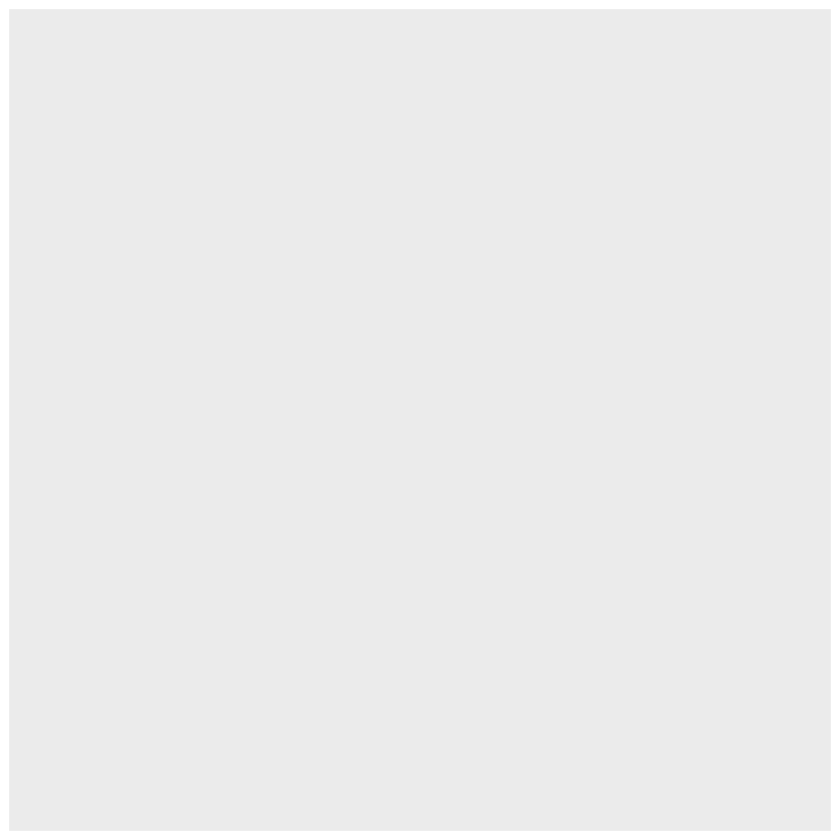

In [24]:
ggplot(HR)

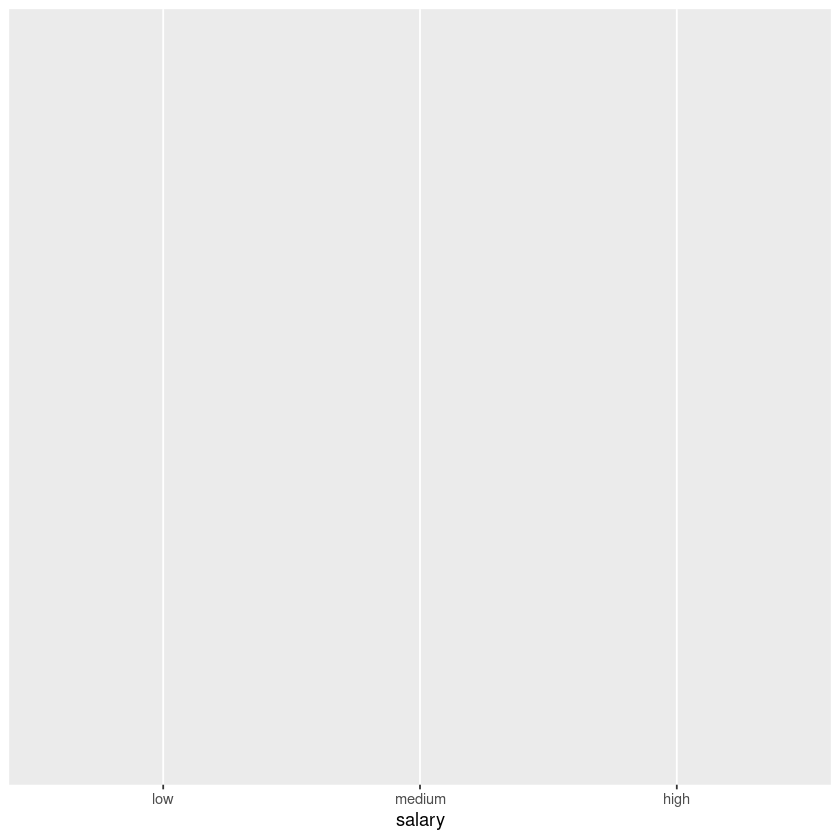

In [25]:
ggplot(HR,aes(x = salary))

* 막대그래프 `geom_bar`
> geom_bar(fill = 색깔) 또는 geom_bar(aes(fill = 변수))
> 
> 위와 같이 aes() 내에 변수가 들어가야 한다.

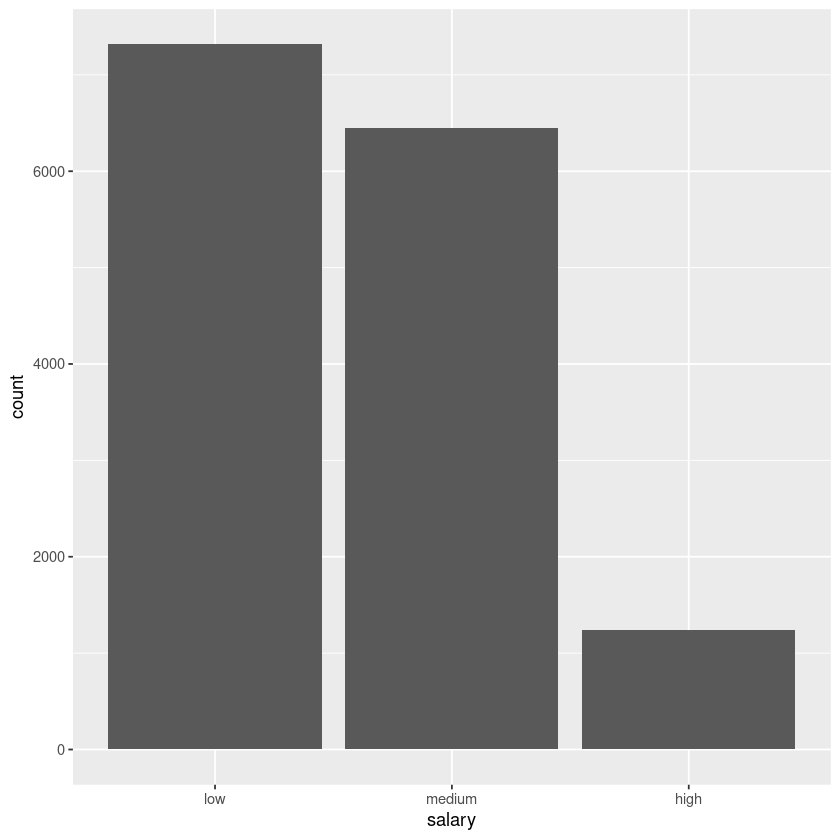

In [26]:
ggplot(HR,aes(x=salary)) +  
  geom_bar()

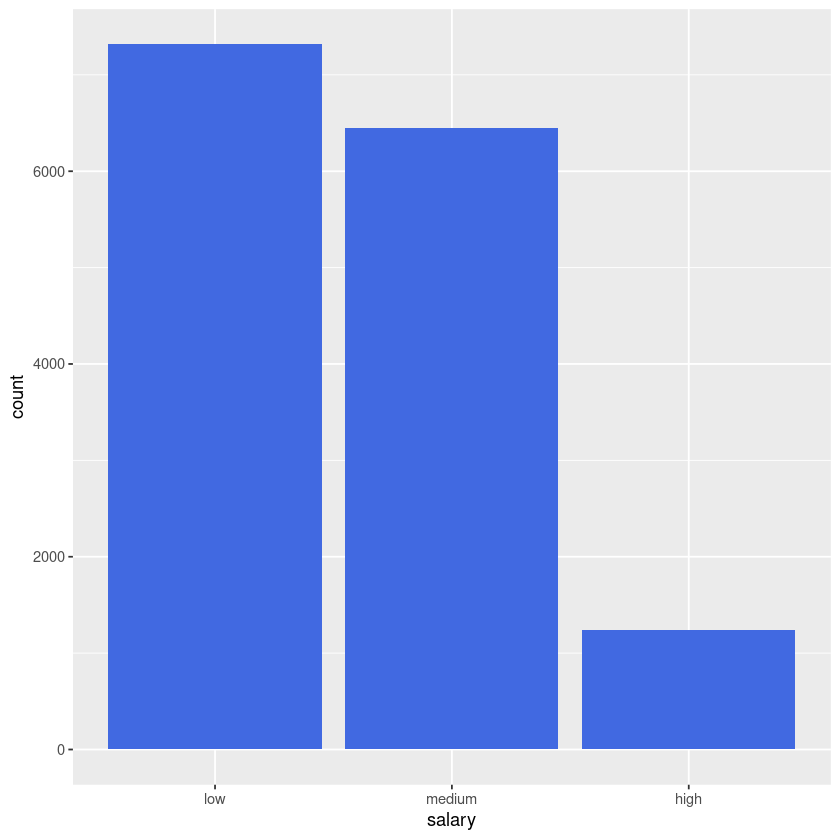

In [27]:
ggplot(HR,aes(x=salary)) +  
  geom_bar(fill = 'royalblue') 

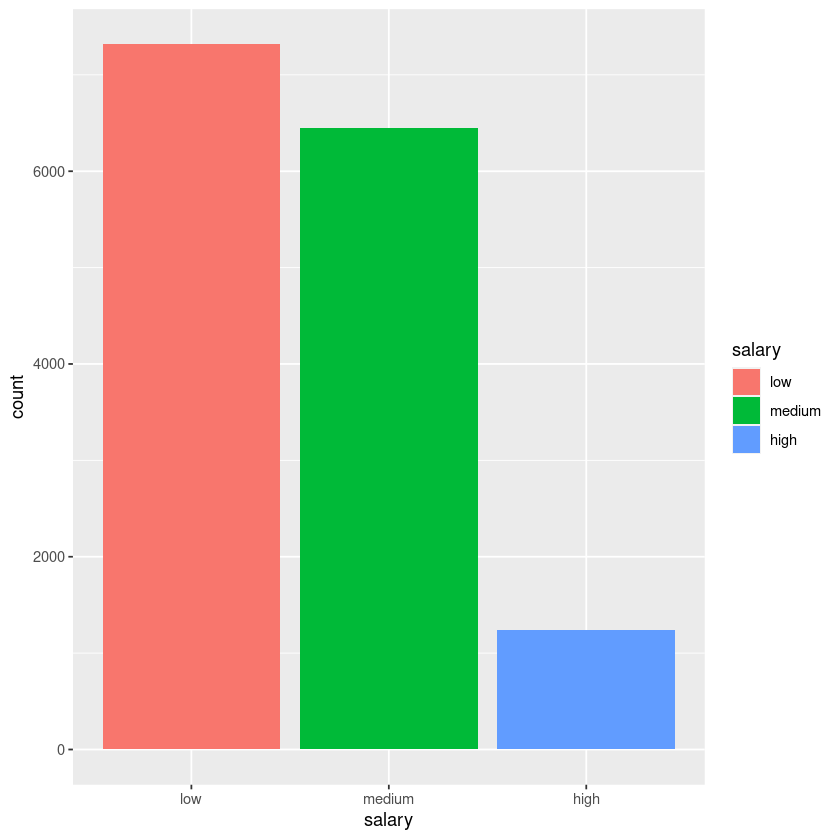

In [28]:
ggplot(HR,aes(x=salary)) +  
  geom_bar(aes(fill=salary)) 

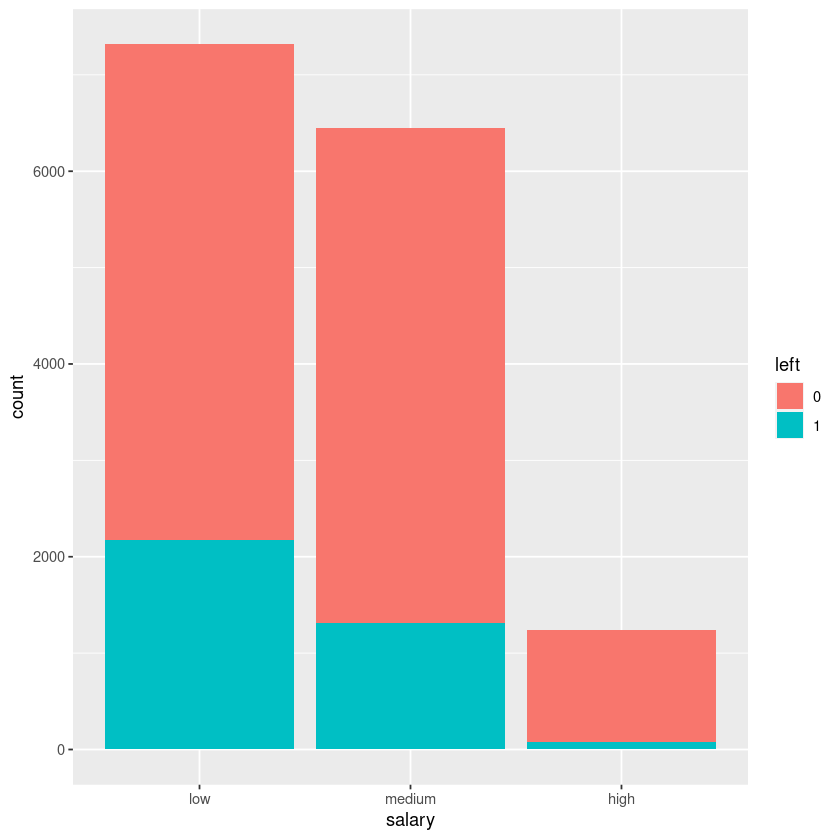

In [29]:
ggplot(HR,aes(x=salary)) +  
  geom_bar(aes(fill=left))  # left 값에 따라 색 채우기 

* 히스토그램 `geom_histogram`

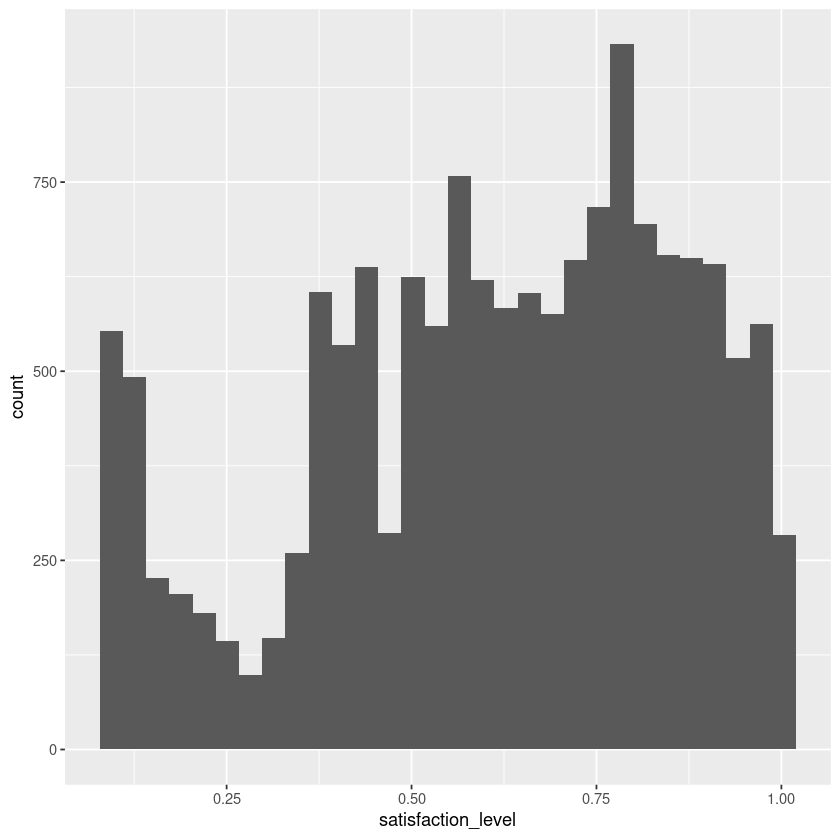

In [30]:
# 기본
ggplot(HR,aes(x=satisfaction_level))+
 geom_histogram(bins=30)

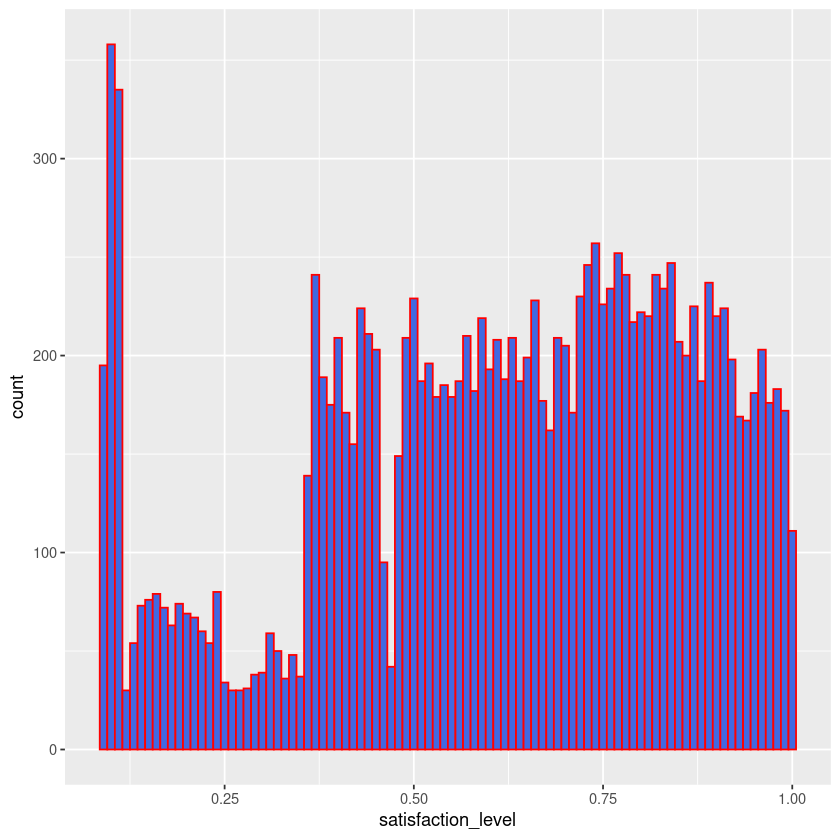

In [31]:
# 구간 수정 및 색 입히기
# col은 테두리 색을, fill은 채워지는 색을 바꿔준다.
ggplot(HR,aes(x=satisfaction_level))+
  geom_histogram(binwidth = 0.01,col='red',fill='royalblue') 

* 밀도그래프 `geom_density`

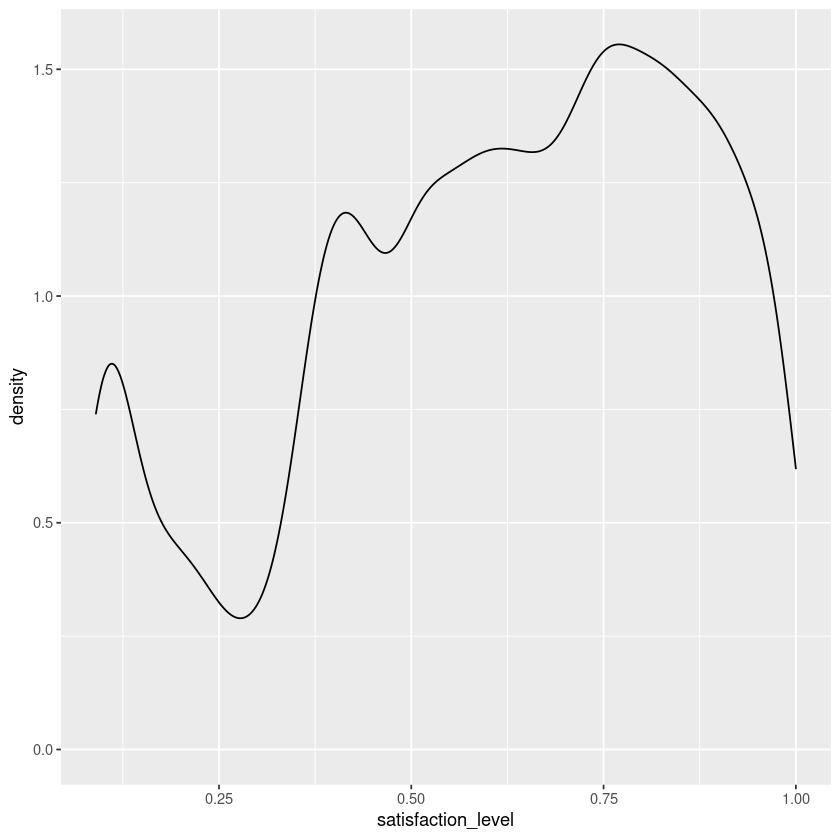

In [32]:
# 기본
ggplot(HR,aes(x=satisfaction_level))+
 geom_density()

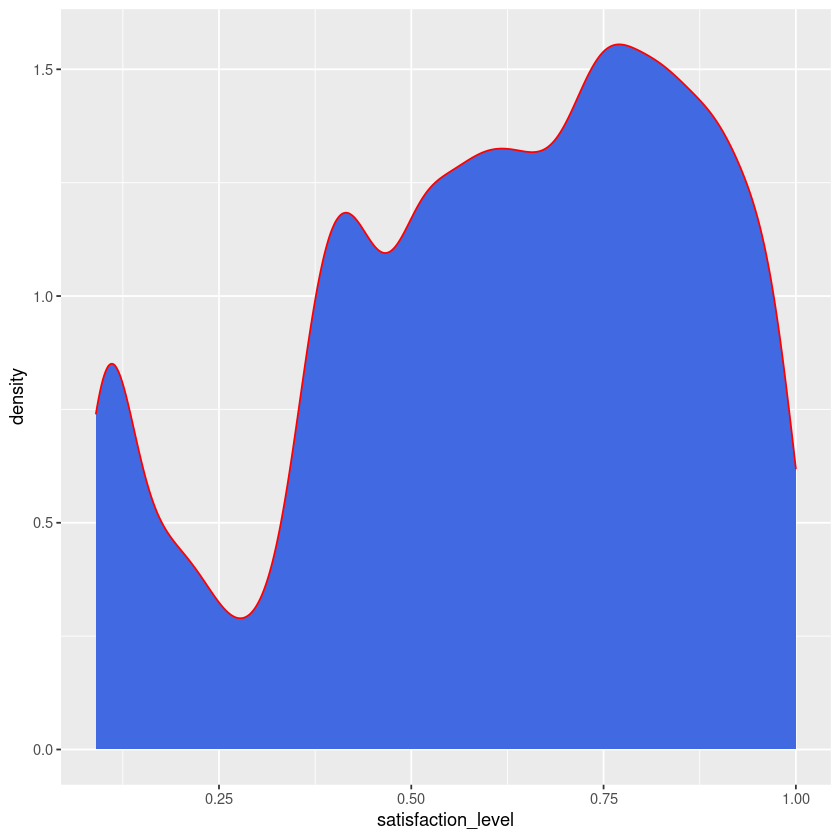

In [33]:
# 색 입히기
ggplot(HR,aes(x=satisfaction_level))+
  geom_density(col='red',fill='royalblue') # col은 테두리, fill은 채우기박스플롯

* 박스플롯 `geom_boxplot`

이산형 변수에 따라 연속형 변수의 분포 차이를 표현해주는 2차원 그래프

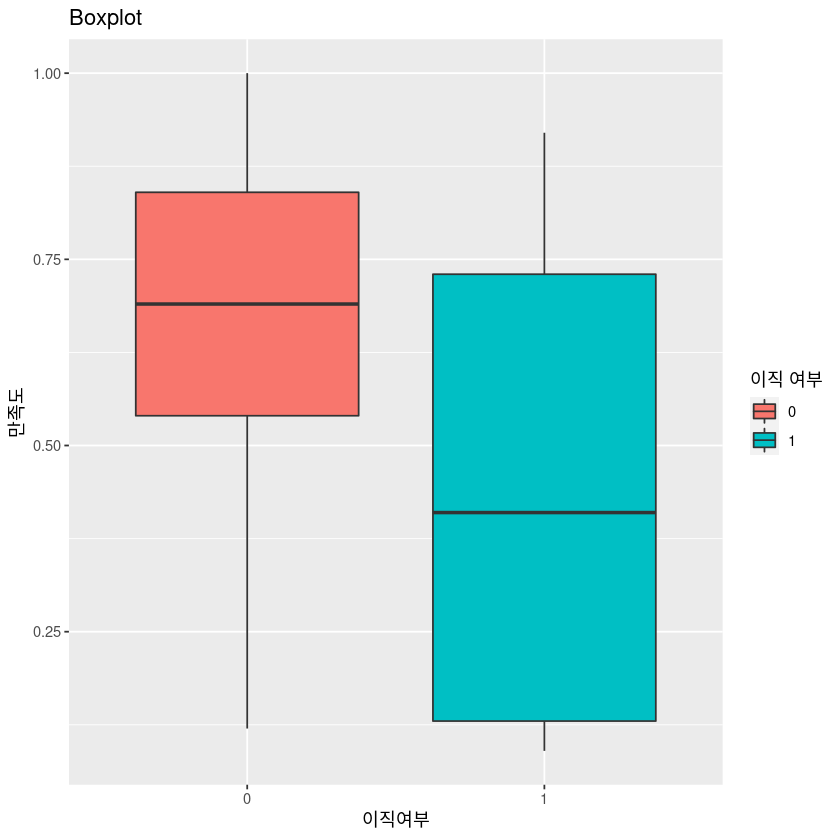

In [34]:
# 기본
ggplot(HR,aes(x=left,y=satisfaction_level)) +
 geom_boxplot(aes(fill = left)) +
 xlab("이직여부") + ylab("만족도") + ggtitle("Boxplot") +
 labs(fill = "이직 여부")

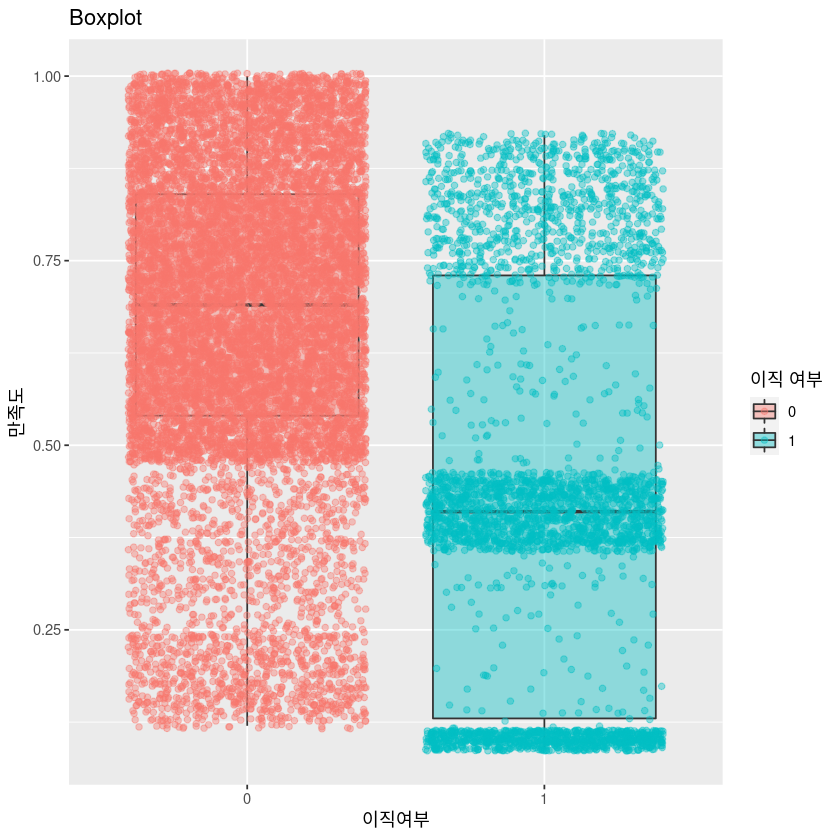

In [35]:
# 기본에서 조금 더 추가
ggplot(HR,aes(x=left,y=satisfaction_level)) +
  geom_boxplot(aes(fill = left),alpha = I(0.4)) + 
  geom_jitter(aes(col = left),alpha = I(0.4)) + 
  xlab("이직여부") + ylab("만족도") + ggtitle("Boxplot") +
  labs(fill = "이직 여부", col = "이직 여부")

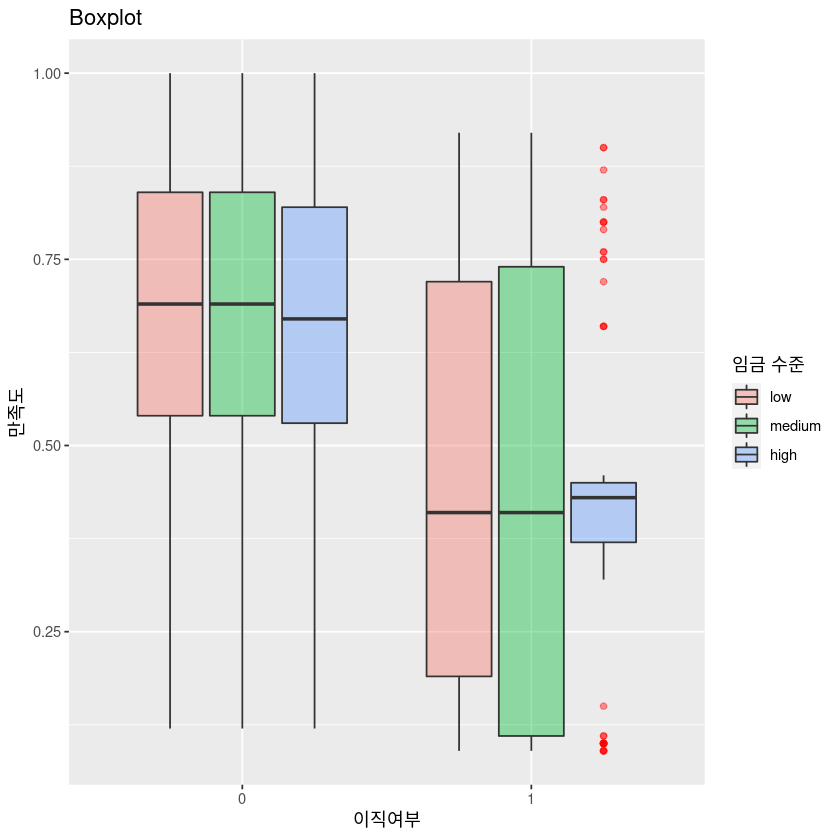

In [36]:
# 기본에서 조금 더 추가에서 조금 변경
ggplot(HR,aes(x=left,y=satisfaction_level)) +
  geom_boxplot(aes(fill = salary),alpha = I(0.4),outlier.colour = 'red') +
  xlab("이직여부") + ylab("만족도") + ggtitle("Boxplot") +
  labs(fill = "임금 수준") 

* 산점도 `geom_point`

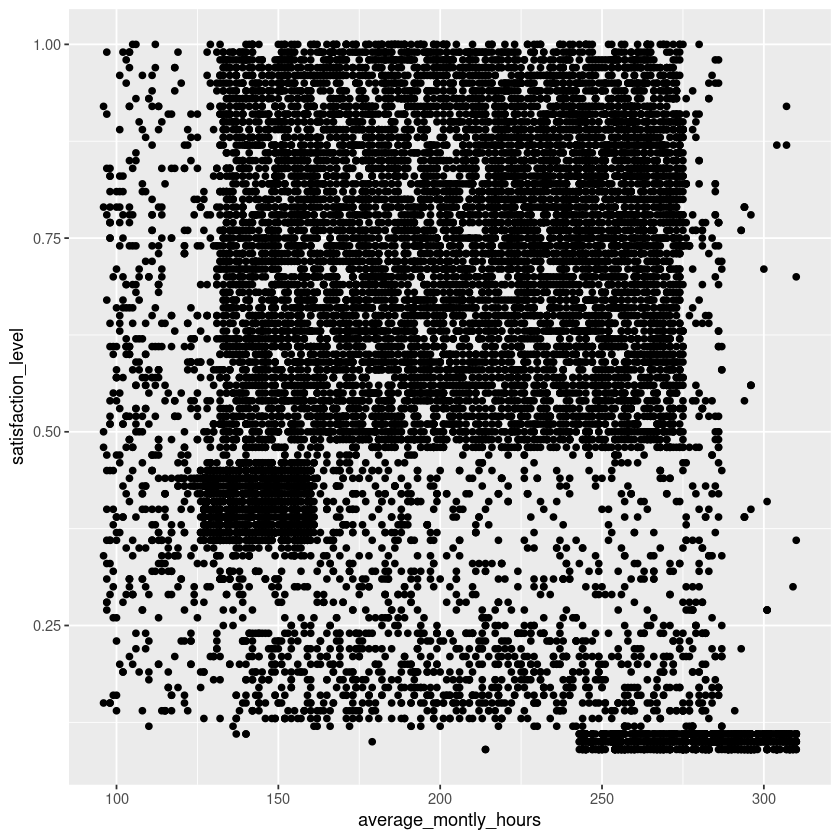

In [37]:
# 기본
ggplot(HR,aes(x=average_montly_hours,y=satisfaction_level))+
  geom_point()

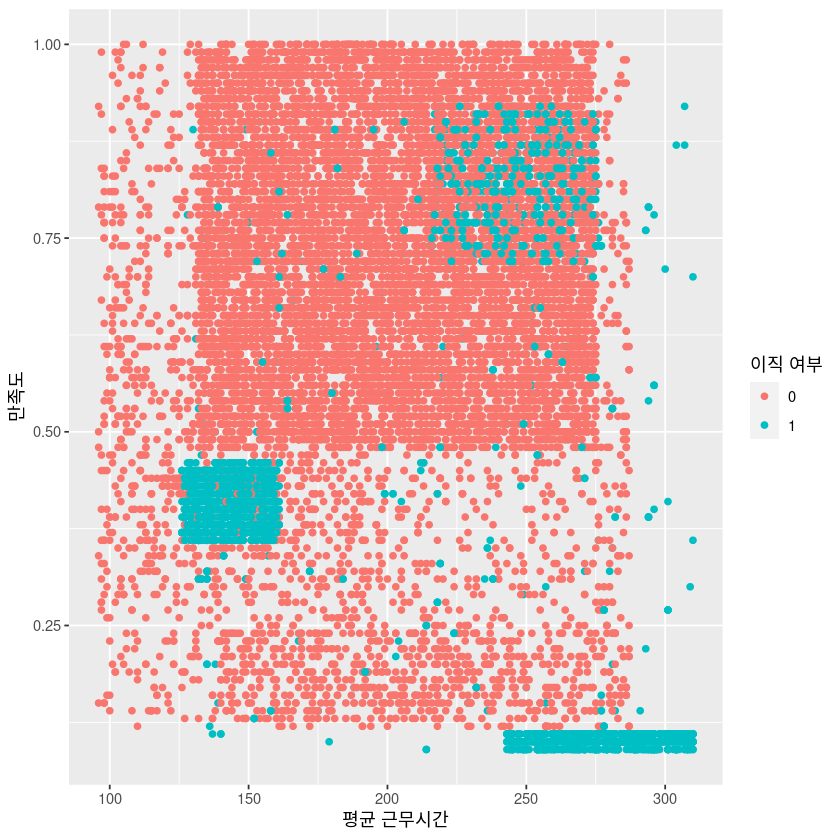

In [38]:
# 간단한 색칠로 인사이트 발굴하기
ggplot(HR,aes(x=average_montly_hours,y=satisfaction_level))+
  geom_point(aes(col = left)) + 
  labs(col = '이직 여부') + xlab("평균 근무시간") + ylab("만족도")

# Review

In [ ]:
# HR 데이터의 행의 수, 열의 수를 구하시오.

In [ ]:
# salary변수의 strings에 대해 답하시오.

In [ ]:
# salary변수에 대하여 low는 1, medium은 2, high는 3의 값을 가져 
# 서열정보를 가지게 하는 salary_New 변수를 만드시오.

In [ ]:
# Salary_New 값이 2이면서 left는 1인 직원들만 뽑아 Medium_Left라는 새로운 데이터프레임을 만드시오.

In [ ]:
# Medium_Left 데이터에 대해 sales변수 별로 time_spend_company의 평균을 구하여, 
# Time_spend_Mean이라는 데이터프레임을 만드시오.

In [ ]:
# Time_spend_Mean 데이터프레임을 이용하여 
# sales별 time_spend_company의 평균을 나타내는 막대도표를 그리시오.
# (stat = ‘identity’ 옵션 활용 필요)